In [1]:
# Import tools
import os
import pathlib #finds the home folder
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import hvplot.pandas
import zipfile
import numpy
import xarray as xr
import rioxarray as rxr
import cartopy as ccrs
import earthaccess
import glob
from glob import glob
from math import floor, ceil

In [2]:
# load stored grassland_gdf's 
%store -r shey_gdf
%store -r a_soil_url_list

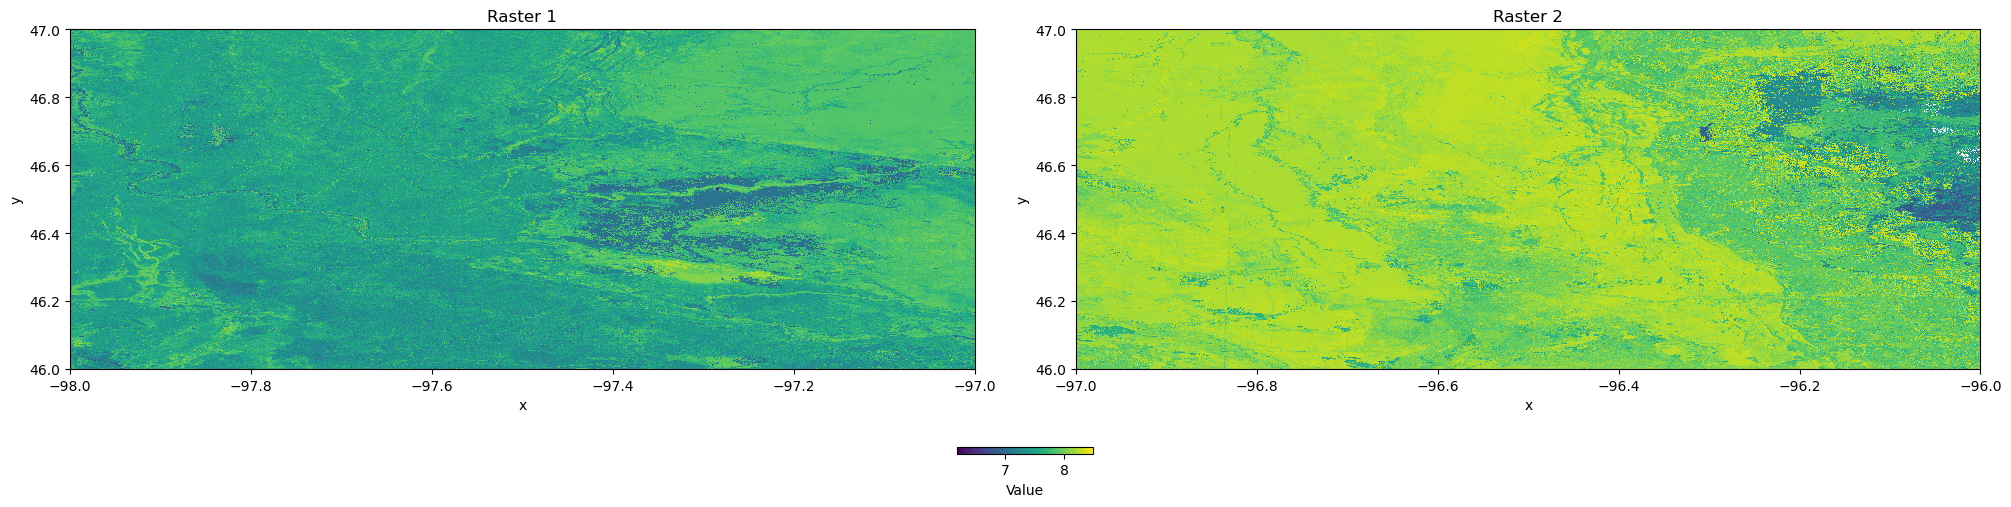

In [3]:
# Combine the lists
soil_urls = a_soil_url_list

# Set up subplots (adjust rows and columns for layout)
fig, axes = plt.subplots(nrows=1, ncols=len(soil_urls), figsize=(20, 5), constrained_layout=True)

# Loop through each raster, open it, and plot in a subplot
cbar_mappable = None  # To store the QuadMesh object for the colorbar
for i, soil_url in enumerate(soil_urls):
    soil_da = rxr.open_rasterio(soil_url, mask_and_scale=True).squeeze()

    # Plot the raster on the corresponding subplot
    quadmesh = soil_da.plot(ax=axes[i], add_colorbar=False)
    axes[i].set_title(f"Raster {i + 1}")  # Add a title to each subplot

    # Store the QuadMesh object for the colorbar
    if cbar_mappable is None:
        cbar_mappable = quadmesh

# Add a global colorbar
fig.colorbar(cbar_mappable, ax=axes, orientation="horizontal", fraction=0.02, pad=0.1).set_label("Value")

plt.show()

In [4]:
# load stored grassland_gdf's 
%store -r curl_gdf
%store -r b_soil_url_list

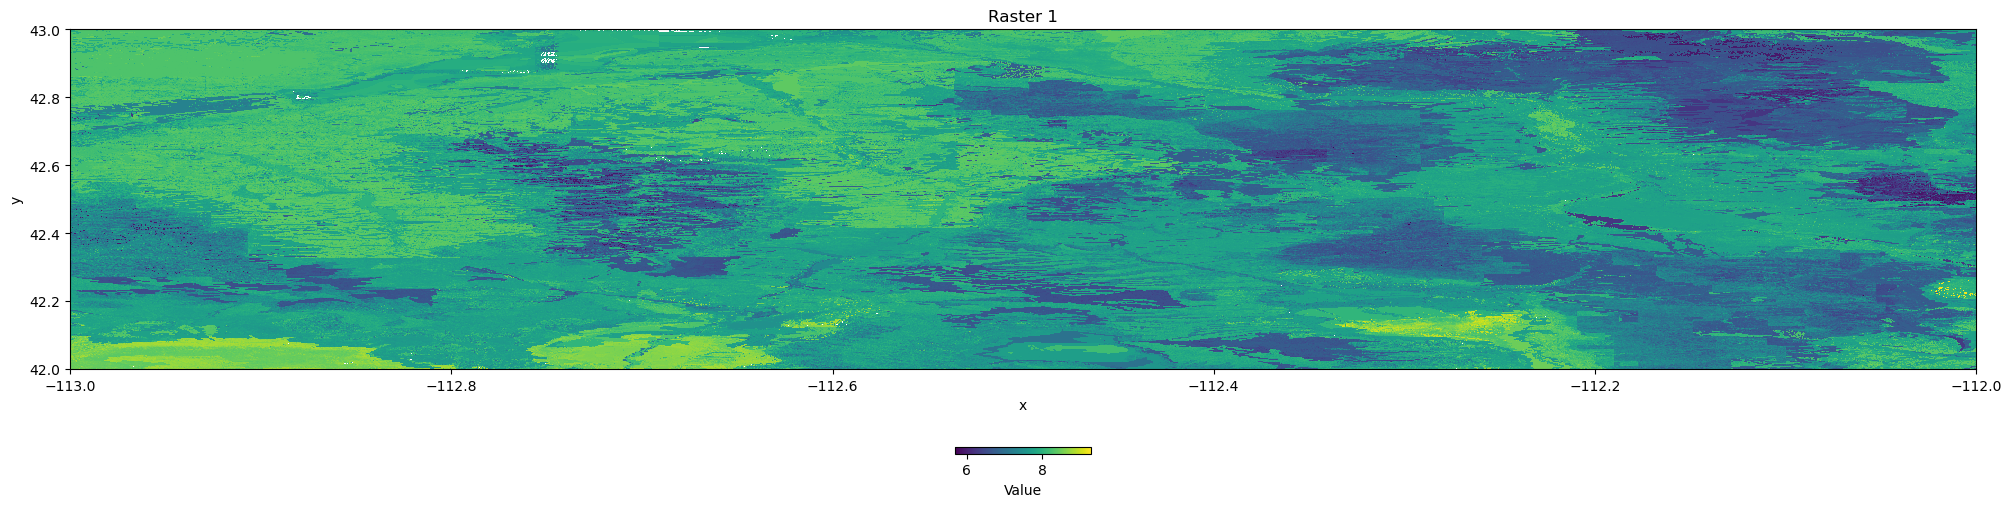

In [7]:
# Combine the lists
soil_urls = b_soil_url_list

# Set up subplots (adjust rows and columns for layout)
fig, axes = plt.subplots(nrows=1, ncols=len(soil_urls), figsize=(20, 5), constrained_layout=True)

# Ensure `axes` is always iterable
if len(soil_urls) == 1:
    axes = [axes]  # Convert single Axes object to a list

# Loop through each raster, open it, and plot in a subplot
cbar_mappable = None  # To store the QuadMesh object for the colorbar
for i, soil_url in enumerate(soil_urls):
    soil_da = rxr.open_rasterio(soil_url, mask_and_scale=True).squeeze()

    # Plot the raster on the corresponding subplot
    quadmesh = soil_da.plot(ax=axes[i], add_colorbar=False)
    axes[i].set_title(f"Raster {i + 1}")  # Add a title to each subplot

    # Store the QuadMesh object for the colorbar
    if cbar_mappable is None:
        cbar_mappable = quadmesh

# Add a global colorbar
fig.colorbar(cbar_mappable, ax=axes, orientation="horizontal", fraction=0.02, pad=0.1).set_label("Value")

plt.show()